### The dataset contains transactions made by credit cards in September 2013 by European cardholders.

##### This dataset is a synthetic version inspired by the original Credit Risk dataset on Kaggle and enriched with additional variables based on Financial Risk for Loan Approval data. SMOTENC was used to simulate new data points to enlarge the instances. The dataset is structured for both categorical and continuous features.

### Packages and a data discovery part

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import  GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.metrics import classification_report
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv("C:\\Users\\aziz\\Desktop\\loan_data.csv")

In [3]:
data.head(5)

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [5]:
data.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


In [6]:
data.isna().sum()/data.shape[0]

person_age                        0.0
person_gender                     0.0
person_education                  0.0
person_income                     0.0
person_emp_exp                    0.0
person_home_ownership             0.0
loan_amnt                         0.0
loan_intent                       0.0
loan_int_rate                     0.0
loan_percent_income               0.0
cb_person_cred_hist_length        0.0
credit_score                      0.0
previous_loan_defaults_on_file    0.0
loan_status                       0.0
dtype: float64

<Axes: >

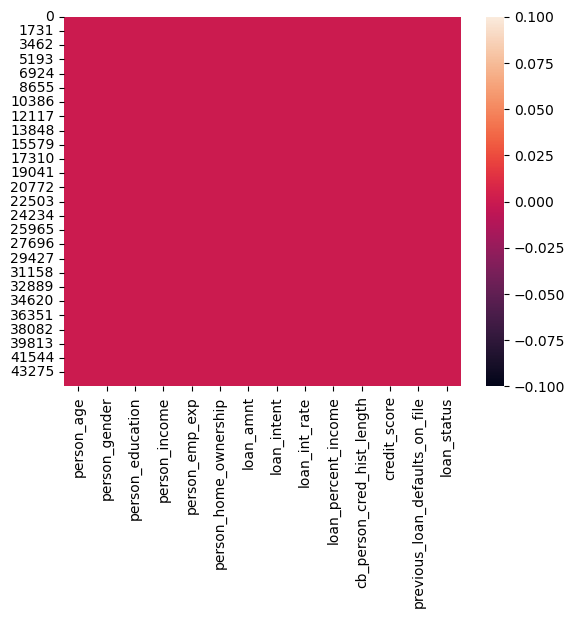

In [7]:
sns.heatmap(data.isna())

##### Converting data

In [8]:
label_encoder = LabelEncoder()

data["person_education_encoded"] = label_encoder.fit_transform(data["person_education"])

data.drop('person_education', axis=1, inplace=True)


In [9]:
one_hot_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
gender_encoded = one_hot_encoder.fit_transform(data[["person_gender"]])
gender_encoded_df = pd.DataFrame(gender_encoded, columns=one_hot_encoder.get_feature_names_out(["person_gender"]))
data = pd.concat([data, gender_encoded_df], axis=1)
data.drop('person_gender',axis=1, inplace=True)

In [10]:
one_hot_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
own_encoded = one_hot_encoder.fit_transform(data[['person_home_ownership']])
original_names = data['person_home_ownership'].unique()
own_encoded_df = pd.DataFrame(own_encoded, columns=original_names)
data = pd.concat([data, own_encoded_df], axis=1)
data.drop(columns=['person_home_ownership'], inplace=True)

In [11]:
one_hot_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
loan_intent_encoded = one_hot_encoder.fit_transform(data[['loan_intent']])
original_loan_intent_names = data['loan_intent'].unique()
loan_intent_encoded_df = pd.DataFrame(loan_intent_encoded, columns=original_loan_intent_names)
data = pd.concat([data, loan_intent_encoded_df], axis=1)
data.drop(columns=['loan_intent'], inplace=True)

In [12]:
one_hot_encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
defaults_encoded = one_hot_encoder.fit_transform(data[['previous_loan_defaults_on_file']])
defaults_encoded_df = pd.DataFrame(defaults_encoded, columns=one_hot_encoder.get_feature_names_out(['previous_loan_defaults_on_file']))
data = pd.concat([data, defaults_encoded_df], axis=1)
data.drop(columns=['previous_loan_defaults_on_file'], inplace=True)

### Checking the Numerical data


In [13]:
for i in data.select_dtypes(exclude='object'):
    print(f"data[{i}] has a variance equal to {data[i].var()}")


data[person_age] has a variance equal to 36.54333328691454
data[person_income] has a variance equal to 6467778286.197245
data[person_emp_exp] has a variance equal to 36.766421364927105
data[loan_amnt] has a variance equal to 39877793.914373636
data[loan_int_rate] has a variance equal to 8.873298770339842
data[loan_percent_income] has a variance equal to 0.007605986669134661
data[cb_person_cred_hist_length] has a variance equal to 15.052086407353764
data[credit_score] has a variance equal to 2543.77647837307
data[loan_status] has a variance equal to 0.1728433471359405
data[person_education_encoded] has a variance equal to 2.187878481743649
data[person_gender_female] has a variance equal to 0.24729918393247682
data[person_gender_male] has a variance equal to 0.24729918393247682
data[RENT] has a variance equal to 0.2420606280138948
data[OWN] has a variance equal to 0.002593297628839187
data[MORTGAGE] has a variance equal to 0.061278694588202634
data[OTHER] has a variance equal to 0.249566

### Split the data 


In [14]:
Y=data["loan_status"]
X = data.drop("loan_status", axis=1)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, stratify=Y, random_state=42)

In [16]:
scaler = StandardScaler()
X_train_scaled= scaler.fit_transform(X_train)

In [17]:
X_test['person_income']=np.log(X_test['person_income'])
X_test['loan_amnt']=np.log(X_test['loan_amnt'])

In [18]:
X_train['person_income']=np.log(X_train['person_income'])
X_train['loan_amnt']=np.log(X_train['loan_amnt'])

In [19]:
X_test_scaled = scaler.transform(X_test)

### Models


#### Random Forest


In [20]:
rf_model = RandomForestClassifier(random_state=42)

rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_grid_search = GridSearchCV(estimator=rf_model, param_grid=rf_param_grid,
                               scoring='accuracy', cv=3, n_jobs=-1, verbose=2)
rf_grid_search.fit(X_train_scaled, y_train)

print("Best parameters for Random Forest:", rf_grid_search.best_params_)
rf_best_model = rf_grid_search.best_estimator_

y_pred_rf = rf_best_model.predict(X_test_scaled)
print("Classification report for Random Forest:\n", classification_report(y_test, y_pred_rf))


Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best parameters for Random Forest: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Classification report for Random Forest:
               precision    recall  f1-score   support

           0       0.99      0.71      0.83      8750
           1       0.49      0.98      0.66      2500

    accuracy                           0.77     11250
   macro avg       0.74      0.85      0.74     11250
weighted avg       0.88      0.77      0.79     11250



#### XGBoost


In [21]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

xgb_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0]
}

xgb_grid_search = GridSearchCV(estimator=xgb_model, param_grid=xgb_param_grid,
                                scoring='accuracy', cv=3, n_jobs=-1, verbose=2)
xgb_grid_search.fit(X_train_scaled, y_train)

print("Best parameters for XGBoost:", xgb_grid_search.best_params_)
xgb_best_model = xgb_grid_search.best_estimator_

y_pred_xgb = xgb_best_model.predict(X_test_scaled)
print("Classification report for XGBoost:\n", classification_report(y_test, y_pred_xgb))

Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 1.0}
Classification report for XGBoost:
               precision    recall  f1-score   support

           0       0.99      0.72      0.84      8750
           1       0.50      0.97      0.66      2500

    accuracy                           0.78     11250
   macro avg       0.75      0.85      0.75     11250
weighted avg       0.88      0.78      0.80     11250



#### SVC

In [22]:
svm_model = SVC()

svm_param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto', 0.01, 0.1]
}

svm_grid_search = GridSearchCV(estimator=svm_model, param_grid=svm_param_grid,
                                scoring='accuracy', cv=3, n_jobs=-1, verbose=2)
svm_grid_search.fit(X_train_scaled, y_train)

print("Best parameters for SVM:", svm_grid_search.best_params_)
svm_best_model = svm_grid_search.best_estimator_

y_pred_svm = svm_best_model.predict(X_test_scaled)
print("Classification report for SVM:\n", classification_report(y_test, y_pred_svm))

Fitting 3 folds for each of 48 candidates, totalling 144 fits
Best parameters for SVM: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
Classification report for SVM:
               precision    recall  f1-score   support

           0       0.98      0.76      0.86      8750
           1       0.53      0.95      0.68      2500

    accuracy                           0.80     11250
   macro avg       0.76      0.86      0.77     11250
weighted avg       0.88      0.80      0.82     11250



#### Linear Regression 

In [29]:
ridge_model = Ridge()

ridge_param_grid = {
    'alpha': [0.1, 1, 10, 100],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg']
}

ridge_grid_search = GridSearchCV(estimator=ridge_model, param_grid=ridge_param_grid,
                                  scoring='neg_mean_squared_error', cv=3, n_jobs=-1, verbose=2)
ridge_grid_search.fit(X_train_scaled, y_train)

print("Best parameters for Ridge Regression:", ridge_grid_search.best_params_)
ridge_best_model = ridge_grid_search.best_estimator_

y_pred_ridge = ridge_best_model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred_ridge)
print("Mean Squared Error for Ridge Regression:", mse)


Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best parameters for Ridge Regression: {'alpha': 100, 'solver': 'svd'}
Mean Squared Error for Ridge Regression: 0.10210139020794737


##### This is a foundational machine learning project designed to illustrate the essential pipeline of a basic ML workflow. While it may lack advanced preprocessing techniques and visualizations, it serves as a useful demonstration of the standard processes involved in developing a machine learning model. The project aims to provide a clear understanding of the fundamental steps required to build a successful ML application.

